# Bloch Spheres

In [7]:
import qiskit as qk
from qiskit.tools.visualization import plot_bloch_multivector

In [8]:
state_vector_sim=qk.Aer.get_backend("statevector_simulator")
qasm_sim=qk.Aer.get_backend("qasm_simulator")

In [9]:
def do_job(circuit):
    result=qk.execute(circuit, backend=state_vector_sim).result()
    state_vec=result.get_statevector()
    
    n_qubits=circuit.n_qubits
    circuit.measure([i for i in range(n_qubits)],[i for i in range(len(circuit.clbits))])
    
    qasm_job=qk.execute(circuit,backend=qasm_sim, shots=1024).result()
    counts=qasm_job.get_counts()
    return state_vec, counts

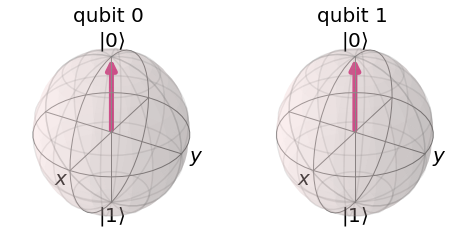

In [10]:
circuit = qk.QuantumCircuit(2,2)
state_vec,counts = do_job(circuit)
plot_bloch_multivector(state_vec)

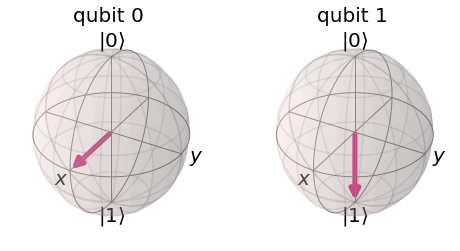

In [11]:
circuit = qk.QuantumCircuit(2,2)
circuit.h(0)
circuit.x(1)
state_vec,counts = do_job(circuit)
plot_bloch_multivector(state_vec)